In [1]:
# rich output 출력위치 설정
# => 웹 브라우저에서 바로 봄
get_ipython().run_line_magic('matplotlib', 'inline')

# 색상 출력
# 설치 방법 => pip install termcolor
from termcolor import colored
def c(tag, data, under=3):

    val = colored(tag + ':\n', 'magenta', attrs=['bold'])
    t = type(data)
    val += colored(t, 'magenta')
    under = str(under)
    
    import numpy
    if t is float or t is numpy.float64:
        val += ('\n{:.' + under + 'f}\n').format(data)
    else:
        val += '\n{}\n'.format(data)
    return val

#### <span style="color:#184;background:#EEE">2.3.6. 결정 트리의 앙상블</span><br>

- **<span style="color:#C22">랜덤 포레스트</span>**<br><br>

    - **랜덤의 과대적합된 결정 트리들의 평균을 내는 것이 기본적인 아이디어**
    - 각 트리마다 부트스트랩 샘플(bootstrap sample)을 생성, 특성의 일부만 사용

In [6]:
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

X, y = make_moons(n_samples=100, noise=0.25, random_state=3)

print(c('input shape', X.shape))
print(c('target shape', y.shape))

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

forest = RandomForestClassifier(n_estimators=5, random_state=2)
forest.fit(X_train, y_train)

print(c('train score', forest.score(X_train, y_train)))
print(c('test score', forest.score(X_test, y_test)))

input shape:
<class 'tuple'>
(100, 2)

target shape:
<class 'tuple'>
(100,)

train score:
<class 'numpy.float64'>
0.960

test score:
<class 'numpy.float64'>
0.920



- RandomForestClassifier
  - http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html
  - 각 트리에 대해 독립적인 bootstrap sample 생성
    - bootstrap samples
      - n_samples 개의 데이터 포인트 중에서 무작위로 n_samples 개의 데이터를 추출 (하나의 샘플이 중복되어 추출 가능)
  - n_estimators
    - 생성할 트리의 개수    
  - max_features
    - 각 트리 노드에서 후보 특성을 무작위로 선정
    - 그러한 선정 작업시에 몇 개의 특성까지 선정할지를 결정함
    - 후보 특성을 선정하는 작업은 매 노드마다 반복 --> 각 노드는 서로 다른 후보 특성을 사용하게 됨
    - max_features를 n_features로 설정하면 각 노드에서 모든 특성을 고려 --> 무작위성이 줄어들게 됨
    - max_features를 1로 설정하면 각 노드에서 선택된 특성의 임계값만으로 분기 --> 트리의 깊이가 깊어짐
    - 기본값: auto
      - RandomForestClassifier: sqrt(n_features)
      - RandomForestRegressor: n_features
  - n_jobs
    - 사용할 CPU 코어 수 지정
    - n_jobs = -1 로 지정하면 컴퓨터의 모든 코어 사용
  - random_state
    - 서로 다른 random_state에 대해 전혀 다른 트리들이 생성
  - max_depth
    - 사전 가지치기 옵션
  - min_samples_split: int, float, optional (default=2)
    - The minimum number of samples required to split an internal node:
    - If int, then consider min_samples_split as the minimum number.
    - If float, then min_samples_split is a percentage and ceil(min_samples_split * n_samples) are the minimum number of samples for each split.

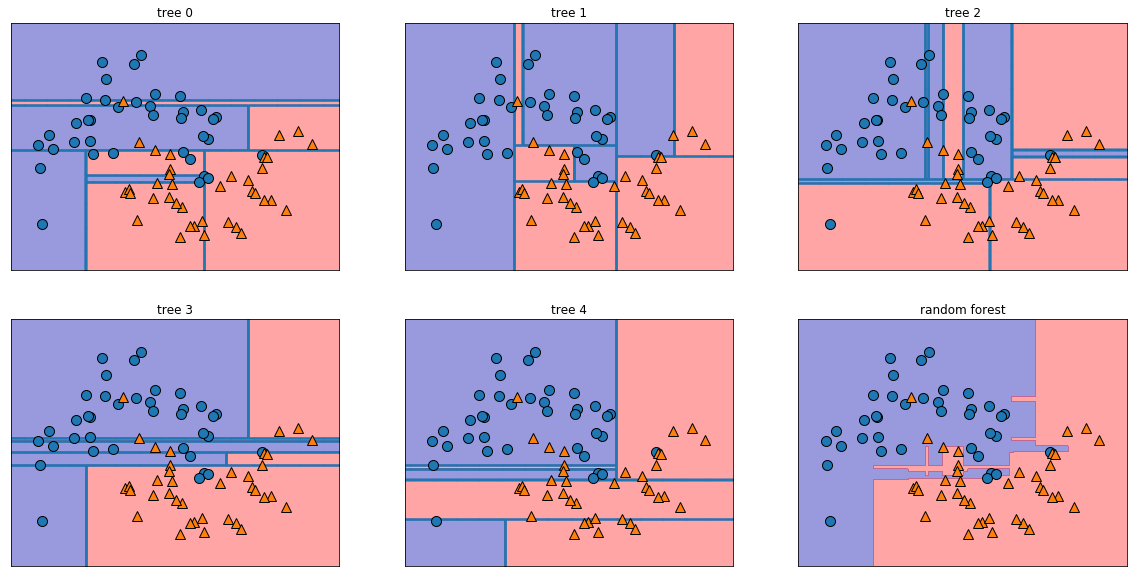

In [16]:
import matplotlib.pyplot as plt
import sys
sys.path.append('..')
import mglearn

from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

X, y = make_moons(n_samples=100, noise=0.25, random_state=3)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)
forest = RandomForestClassifier(n_estimators=5, random_state=2)
forest.fit(X_train, y_train)

fig, axes = plt.subplots(2, 3, figsize=(20, 10))
for i, (ax, tree) in enumerate(zip(axes.ravel(), forest.estimators_)):
    ax.set_title('tree {}'.format(i))
    mglearn.plots.plot_tree_partition(X_train, y_train, tree, ax=ax)
    
mglearn.plots.plot_2d_separator(forest, X_train, fill=True, ax=axes[-1, -1], alpha=.4)
axes[-1, -1].set_title('random forest')
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)

train score:
<class 'numpy.float64'>
1.000

test score:
<class 'numpy.float64'>
0.972



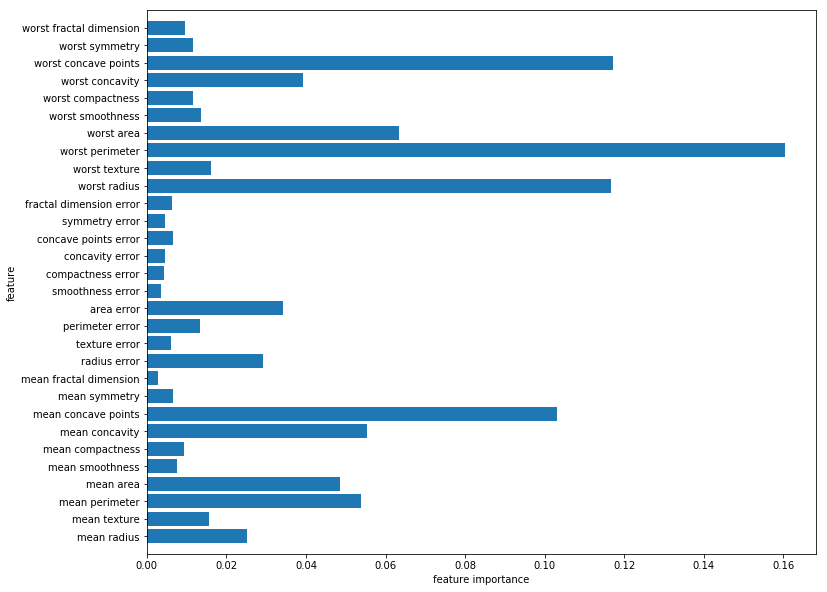

In [18]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=0)
forest = RandomForestClassifier(n_estimators=100, random_state=0)
forest.fit(X_train, y_train)

# 기본 설정으로 만들어도 우수한 성능을 보임
print(c('train score', forest.score(X_train, y_train)))
print(c('test score', forest.score(X_test, y_test)))

n_features = cancer.data.shape[1]
plt.figure(figsize=(12, 10), facecolor='w', edgecolor='k')
plt.barh(range(n_features), forest.feature_importances_, align='center')
plt.yticks(np.arange(n_features), cancer.feature_names)
plt.xlabel('feature importance')
plt.ylabel('feature')
plt.ylim(-1, n_features)
plt.show()

- 랜덤 포레스트를 만드는 무작위성
  - 알고리즘이 가능성 있는 많은 경우를 고려할 수 있게 해줌
  - 단일 트리 방식보다 더 넓은 시각으로 데이터를 바라볼 수 있게 해줌

###### Strengths, weaknesses, and parameters
- 랜던 포레스트는 회귀와 분류에 있어서 가장 널리 사용되는 머신러닝 알고리즘
- 대부분의 경우에 있어서 성능이 뛰어나고 매개변수 튜닝없이도 잘 작동
- 데이터 feature개수가 많지만 (차원이 높고) 희소한 데이터에서는 성능이 낮음
- 선형 모델보다 속도가 느리고 더 많은 메모리 사용
- 가용한 시간과 메모리가 허용하는 한 n_estimators는 클수록 좋음 --> 더 많은 트리 사용

#### Gradient Boosted Regression Trees (Gradient Boosting Machines)
- 회귀와 분류 모두에 사용
  - GradientBoostingClassifier
  - GradientBoostingRegressor
- 이전 트리의 예측과 타깃값 사이의 오차를 줄이는 방향으로 트리를 구성
  - 경사 하강법을 사용하여 다음에 추가될 트리가 예측해야 할 값을 보정
- 기본적으로 무작위성이 없으며, 강력한 사전 가지치기 사용
  - 1~5 레벨 정도의 깊지 않은 트리 구성
  - 메모리를 적게 사용하고 예측도 빠름
- 많은 개수의 Weak Learner (얕은 트리의 간단한 모델)를 활용
- 주요 파라미터: learning_rate, n_estimators
  - learning_rate가 크면 이전 트리의 보정을 강하게 하기 때문에 더 복잡한 모델을 구성하게 됨.
  - n_estimators 값을 키워서 앙상블 내에 트리의 개수를 증가시키는 것이 좋음.

In [20]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=0)

gbrt = GradientBoostingClassifier(random_state=0)
gbrt.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(gbrt.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(gbrt.score(X_test, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.958


- GradientBoostingClassifier 파라미터 기본값
  - max_depth=3 (트리 깊이 3)
  - n_estimators = 100 (트리 100개)
  - learning_rate = 0.1

In [21]:
gbrt = GradientBoostingClassifier(random_state=0, max_depth=1)
gbrt.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(gbrt.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(gbrt.score(X_test, y_test)))

Accuracy on training set: 0.991
Accuracy on test set: 0.972


In [22]:
gbrt = GradientBoostingClassifier(random_state=0, learning_rate=0.01)
gbrt.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(gbrt.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(gbrt.score(X_test, y_test)))

Accuracy on training set: 0.988
Accuracy on test set: 0.965


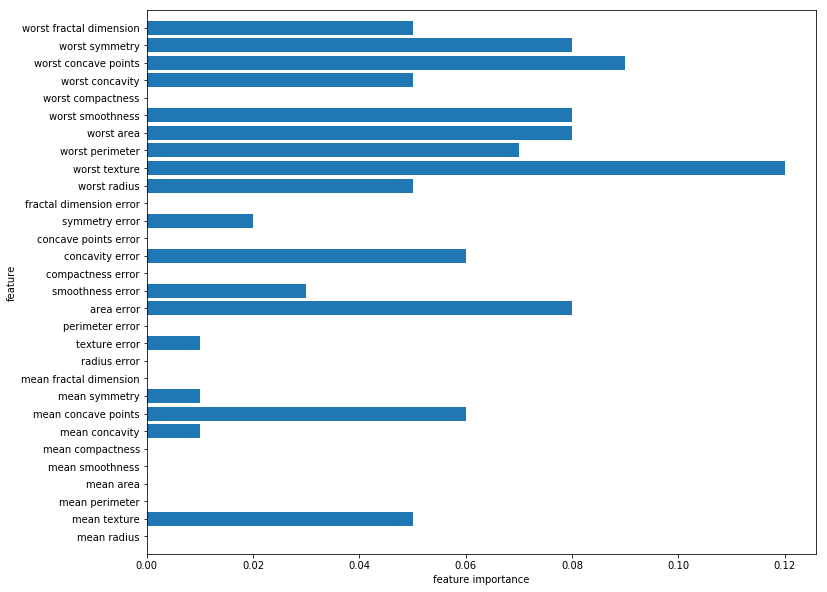

In [23]:
gbrt = GradientBoostingClassifier(random_state=0, max_depth=1)
gbrt.fit(X_train, y_train)

n_features = cancer.data.shape[1]
plt.figure(figsize=(12, 10), facecolor='w', edgecolor='k')
plt.barh(range(n_features), gbrt.feature_importances_, align='center')
plt.yticks(np.arange(n_features), cancer.feature_names)
plt.xlabel('feature importance')
plt.ylabel('feature')
plt.ylim(-1, n_features)
plt.show()

- GradientBoostingClassifier에서는 일부 특성이 종종 완전히 무시됨

##### Strengths, weaknesses and parameters
- GradientBoostingClassifier 방법
  - 지도학습에서 가장 강력하고 널리 사용되는 모델 중 하나
  - 단점
    - 매개변수 조정 필요
    - 훈련시간이 다소 길다.
    - 특성들에 대해 희소한 고차원 데이터에서 잘 작동하지 않음
<!-- more -->
<br/><br/>
- xgboost (https://xgboost.readthedocs.io) 사용 검토 필요
  - 대용량 분산 처리 지원
  - GPU 활용 플러그인 지원